# Otsu's threshold method

In this notebook you will learn how to write your own implementation of Otsu's threshold method (Otsu et al., IEEE, 1979). It will allow you to apply many of the previously introduced concepts of Python programing for image data.

## The algorithm
Otsu's threshold method selects a threshold value to which all pixels in the image are compared. The pixels with gray values below and above the threshold are denoted $A$ and $B$. For a given threshold $t$ between the image's minimal and maximal gray value $t \in ]min(image), max(image)[$, the method calculates the weighted variances $\eta_w$ of pixels in $A$ and $B$:

$\eta_{w, A} = \frac{n_A}{N} \cdot Var(A)$

$\eta_{w, B} = \frac{n_B}{N} \cdot Var(B)$

where $n_A$, $n_B$ and $N$ represent the number of pixels in $A$ and $B$ and $A \cup B$, respectively. The weighted variances are then added:

$\eta_w = \eta_{w, A} + \eta_{w, B}$

This calculation is repeated for every possible threshold value $t$. The optimal threshold is then found when $\eta_w(t)$ is minimal.

## Steps to implement the alorithm:

1. Find the minimal and maximal gray values in the image.
2. Write a `for`-loop that iterates over all possible threshold values.
3. For every possible threshold, retrieve the pixels that are above ($A$) or below ($B$) the respectve threshold value.
4. Calculate the summed weighted variance $\eta_{w} = \eta_{w, A} + \eta_{w, B}$ for every threshold value.
5. Find the threshold value with the lowest variance.

In [2]:
from skimage import data, filters
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# We will use this image as example data
image = data.human_mitosis()

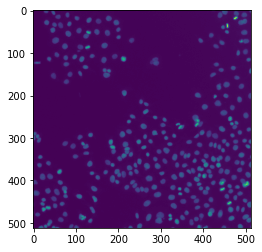

In [4]:
plt.imshow(image)

First, we need to find the minimal and maximal gray values of the image data stored in the variable `image` and create an array of possible threshold values:

In [6]:
min_value = image.min()
max_value = image.max()

threshold_values = np.arange(min_value, max_value, 1)
print(threshold_values)

[  7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24
  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42
  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 25

We create this empty list to store our calculated summed weighted variances

In [75]:
summed_weighted_variance = []

Before writing the for loop for all threshold values, try to implement the calculation of the summed weighted variance for a given single threshold between `min_value` and `max_value`. First, try to find the pixels with intensities above ($A$) and below ($B$) this threshold:

*Tipp: Convert the image to a binary image first!*

In [ ]:
values_below = 
values_above = 

Next, calculate the variances and their weights for $A$ and $B$:

*Tip: Search online whether numpy may have a convenient function for this!*

In [ ]:
variance_below = 
variance_above = 

weight_below = 
weight_above = 

Now, put everything you have just written into a for loop:

In [12]:
variances_below = []
variances_above = []
for threshold in threshold_values:
    
    binary_below = image < threshold
    binary_above = image > threshold
    
    values_below = image[binary_below]
    values_above = image[binary_above]
    
    weight_below = values_below.size/image.size
    weight_above = values_above.size/image.size
    
    _variance_above =  np.var(values_above)# calculate the variance of pixels above the threshold
    _variance_below =  np.var(values_below) # calculate the variance of pixels below the threshold
    
    variances_above.append(_variance_above * weight_above)
    variances_below.append(_variance_below * weight_below)

C:\Users\johamuel\Anaconda3\envs\bia-lecture\lib\site-packages\numpy\core\fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\johamuel\Anaconda3\envs\bia-lecture\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\johamuel\Anaconda3\envs\bia-lecture\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Next, we need to add the weighted variances for every threshold value. For numpy arrays, we can simply add two arrays element-wise with the following syntax:

```
c = a + b
```

...but this will not work for the Python lists `variance_below` and `variance_above`. Convert them to numpy arrays!

In [13]:
variances_below_array = np.asarray(variances_below)
variances_above_array = np.asarray(variances_above)

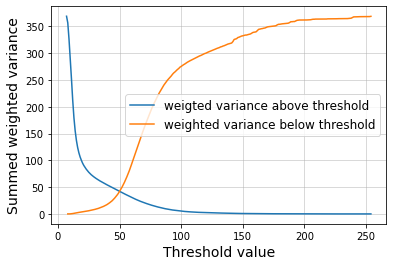

In [27]:
fig, ax = plt.subplots()
ax.plot(threshold_values, variances_above_array, label='weigted variance above threshold')
ax.plot(threshold_values, variances_below_array, label='weighted variance below threshold')
ax.legend(fontsize=12)
ax.set_xlabel('Threshold value', fontsize=14)
ax.set_ylabel('Summed weighted variance', fontsize=14)
ax.grid(alpha=0.6)

fig.savefig('../imgs/8_threshold_types_otsu2.png')

Now, add both measured weighted variances (`variances_above_array` and `variances_below_array`) and plot them just like above:

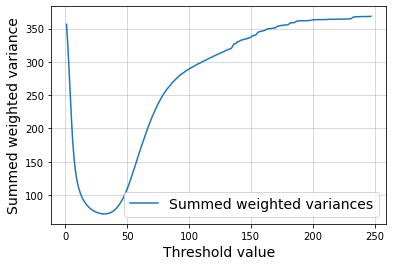

In [21]:
fig, ax = plt.subplots()

ax.plot(variances_above_array + variances_below_array, label = 'Summed weighted variances', zorder=2)
ax.legend(fontsize = 14)
ax.set_xlabel('Threshold value', fontsize=14)
ax.grid(alpha=0.6)
ax.set_ylabel('Summed weighted variance', fontsize=14)

fig.savefig('../imgs/8_threshold_types_otsu.png')

Lastly, we need to find out the threshold value for which the summed weighted variances become minimal. For this, we can find the position in the array of summed variances where the latter are minimal:

In [77]:
min_index = np.argmin(variance_above + variance_below)
min_index

30

In [73]:
# Now, retrieve the correct threshold value
threshold_value =

38

Now, inspect the result. Is this result plausible? If not, what could be the reason?

## Compare results

Luckily, we do not have to do such things for ourselves in daily practice. Skimage, for instance, provides a range of handy functions that perform such tasks.

In [78]:
# Find the function for otsu-thresholding from skimage and compare the result to your implementation!